# 🦷 Dental Implant 10-Year Survival Prediction

## Notebook 01: Exploratory Data Analysis (EDA)

**Objective:** Explore and understand the dataset before building any models. This includes understanding feature distributions, identifying patterns, and detecting potential issues like missing values or class imbalance.

---


### 🎨 Setup: Import Libraries & Configure Plotting Style

We'll use the Periospot brand colors for all visualizations.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Periospot Brand Colors
COLORS = {
    'periospot_blue': '#15365a',
    'mystic_blue': '#003049',
    'periospot_red': '#6c1410',
    'crimson_blaze': '#a92a2a',
    'vanilla_cream': '#f7f0da',
    'black': '#000000',
    'white': '#ffffff',
    'classic_periospot_blue': '#0031af',
    'periospot_light_blue': '#0297ed',
    'periospot_dark_blue': '#02011e',
    'periospot_yellow': '#ffc430',
    'periospot_bright_blue': '#1040dd'
}

# Create a custom color palette for plots
periospot_palette = [
    COLORS['periospot_blue'], 
    COLORS['crimson_blaze'], 
    COLORS['periospot_light_blue'],
    COLORS['periospot_yellow'],
    COLORS['mystic_blue'], 
    COLORS['periospot_red']
]

# Configure matplotlib
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['figure.facecolor'] = COLORS['white']
plt.rcParams['axes.facecolor'] = COLORS['vanilla_cream']
plt.rcParams['axes.edgecolor'] = COLORS['periospot_blue']

# Set seaborn style
sns.set_palette(periospot_palette)

print("✅ Libraries imported and plotting style configured!")


✅ Libraries imported and plotting style configured!


---

### 1. Load Data & Initial Inspection

First, let's load the training data and get a feel for what we're working with.


In [2]:
# STEP 1: Load the training data
# ----------------------------------
# pd.read_csv() reads a CSV file and converts it into a DataFrame (a table-like structure).
# The path '../data/raw/train.csv' means:
#   - '..' = go up one folder (from notebooks/ to the project root)
#   - 'data/raw/train.csv' = then navigate into data/raw/ and load train.csv

df = pd.read_csv('../data/raw/train.csv')

# Display the first 5 rows to get a quick look at the data
# .head() shows the first N rows (default is 5) - like peeking at the first page of a book
df.head()


,patient_id,age,gender,smoking_status,diabetes,vitamin_d_deficiency,history_periodontitis,bruxism,oral_hygiene,bone_quality,jaw_location,implant_length_mm,implant_diameter_mm,implant_surface,placement_timing,insertion_torque_ncm,bone_augmentation,loading_protocol,restoration_type,implant_survival_10y
0,6253,83,Male,Non-smoker,0,0,1,0,Fair,Type_2,Maxilla,8.3,4.1,SLA,Delayed,29,0,Early,Single_Crown,1
1,4685,39,Female,Former,0,0,0,0,Fair,Type_2,Maxilla,11.4,4.5,SLA,Delayed,16,0,Immediate,Bridge,1
2,1732,47,Male,Light,0,0,1,1,Fair,Type_2,Maxilla,13.7,4.1,SLA,Delayed,39,1,Immediate,Bridge,1
3,4743,52,Male,Non-smoker,0,0,0,1,Poor,Type_2,Mandible,13.0,4.9,SLActive,Delayed,41,0,Delayed,Single_Crown,1
4,4522,64,Male,Light,0,0,1,1,Fair,Type_1,Maxilla,11.9,3.5,SLA,Early,63,1,Delayed,Single_Crown,1


In [3]:
# STEP 2: Understand the size of your data
# ------------------------------------------
# .shape returns a tuple: (number_of_rows, number_of_columns)
# - Rows = samples/observations (each row is one dental implant case)
# - Columns = features/variables (the characteristics we recorded for each case)

print(f"Dataset shape: {df.shape}")
print(f"  → {df.shape[0]:,} samples (implant cases)")
print(f"  → {df.shape[1]} features (columns including the target)")


Dataset shape: (7000, 20)
  → 7,000 samples (implant cases)
  → 20 features (columns including the target)


In [4]:
# STEP 3: Inspect data types and check for missing values
# ---------------------------------------------------------
# .info() is like a "patient chart overview" - it shows:
#   - Column names
#   - Data types (int64 = integers, float64 = decimals, object = text/categorical)
#   - Non-null count (how many valid values vs missing)
#   - Memory usage
#
# WHY THIS MATTERS:
#   - ML models expect specific data types (usually numbers)
#   - "object" type columns often need encoding (converting text → numbers)
#   - Missing values need to be handled before modeling

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   patient_id             7000 non-null   int64  
 1   age                    7000 non-null   int64  
 2   gender                 7000 non-null   object 
 3   smoking_status         7000 non-null   object 
 4   diabetes               7000 non-null   int64  
 5   vitamin_d_deficiency   7000 non-null   int64  
 6   history_periodontitis  7000 non-null   int64  
 7   bruxism                7000 non-null   int64  
 8   oral_hygiene           7000 non-null   object 
 9   bone_quality           7000 non-null   object 
 10  jaw_location           7000 non-null   object 
 11  implant_length_mm      7000 non-null   float64
 12  implant_diameter_mm    7000 non-null   float64
 13  implant_surface        7000 non-null   object 
 14  placement_timing       7000 non-null   object 
 15  inse

In [5]:
# STEP 4: Count missing values per column
# -----------------------------------------
# .isnull() creates a True/False mask (True = missing, False = present)
# .sum() counts the True values (since True = 1, False = 0 in Python)
#
# CLINICAL ANALOGY:
#   Like checking which fields in patient records are incomplete.
#   Missing bone density readings? Missing medical history? We need to know!

missing_values = df.isnull().sum()

# Show columns that have at least 1 missing value (if any)
missing_with_values = missing_values[missing_values > 0]

if len(missing_with_values) > 0:
    print("⚠️ Columns with missing values:")
    print(missing_with_values.sort_values(ascending=False))
    print(f"\nTotal missing cells: {missing_values.sum():,}")
else:
    print("✅ No missing values in the dataset!")
    
# Also show the full picture
print("\n📊 Complete missing value count per column:")
print(missing_values)


✅ No missing values in the dataset!

📊 Complete missing value count per column:
patient_id               0
age                      0
gender                   0
smoking_status           0
diabetes                 0
vitamin_d_deficiency     0
history_periodontitis    0
bruxism                  0
oral_hygiene             0
bone_quality             0
jaw_location             0
implant_length_mm        0
implant_diameter_mm      0
implant_surface          0
placement_timing         0
insertion_torque_ncm     0
bone_augmentation        0
loading_protocol         0
restoration_type         0
implant_survival_10y     0
dtype: int64


---

### 2. Summary Statistics & Target Distribution

Understanding the target variable distribution is crucial - it tells us if we're dealing with a balanced or imbalanced classification problem.


In [6]:
# TODO: Generate descriptive statistics for the numerical columns.
# Hint: Use the .describe() method.
print("Numerical statistics:")
print(df.describe())


Numerical statistics:
         patient_id          age     diabetes  vitamin_d_deficiency  \
count   7000.000000  7000.000000  7000.000000           7000.000000   
mean    4962.126571    51.502143     0.153857              0.207000   
std     2882.797435    11.960656     0.360838              0.405184   
min        1.000000    18.000000     0.000000              0.000000   
25%     2476.500000    43.000000     0.000000              0.000000   
50%     4927.000000    52.000000     0.000000              0.000000   
75%     7465.250000    60.000000     0.000000              0.000000   
max    10000.000000    85.000000     1.000000              1.000000   

       history_periodontitis      bruxism  implant_length_mm  \
count            7000.000000  7000.000000        7000.000000   
mean                0.480571     0.172000          11.506743   
std                 0.499658     0.377407           1.966402   
min                 0.000000     0.000000           6.000000   
25%               

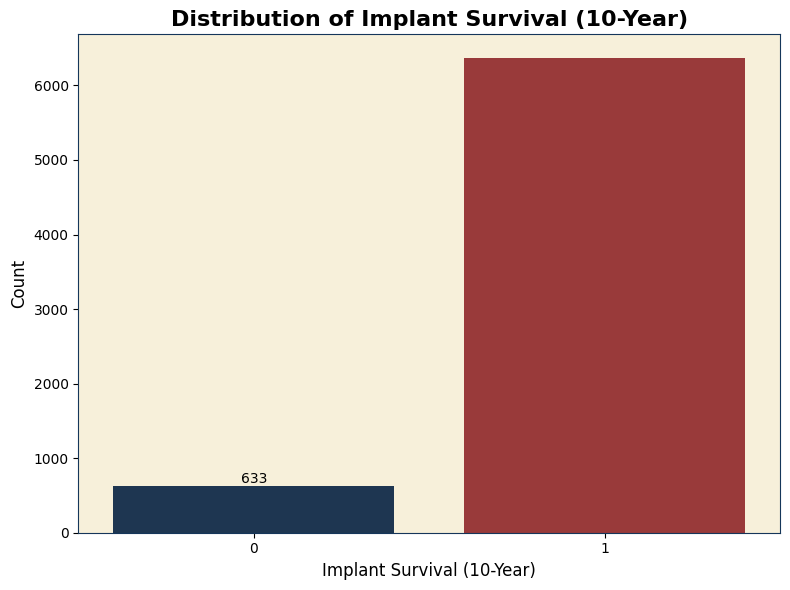

In [7]:
# TODO: Create a count plot to visualize the distribution of the target variable 'implant_survival_10y'.
# Hint: Use sns.countplot(). Remember to save the figure to the /figures/ folder using plt.savefig().

fig, ax = plt.subplots(figsize=(8, 6))

# TODO: Create the count plot

sns.countplot(data=df, x='implant_survival_10y', palette=periospot_palette, ax=ax)

ax.set_title('Distribution of Implant Survival (10-Year)', fontweight='bold')
ax.set_xlabel('Implant Survival (10-Year)')
ax.set_ylabel('Count')

# TODO: Add value labels on bars
# Hint: Use ax.bar_label(ax.containers[0])

ax.bar_label(ax.containers[0])

plt.tight_layout()
# TODO: Save the figure
plt.savefig('../figures/target_distribution.png', dpi=150, bbox_inches='tight')
plt.show()


In [8]:
# TODO: Calculate the percentage of each class in the target variable.
# Hint: Use df['implant_survival_10y'].value_counts(normalize=True) * 100
# This will help you understand if the dataset is imbalanced.

survived_percentage = df['implant_survival_10y'].value_counts(normalize=True) * 100

print(survived_percentage)


implant_survival_10y
1    90.957143
0     9.042857
Name: proportion, dtype: float64


---

### 3. Univariate Analysis (Visualizing Features)

Let's examine each feature individually to understand their distributions.


In [9]:
# TODO: Identify numerical and categorical columns.
# Hint: Use df.select_dtypes(include=['int64', 'float64']).columns for numerical
# and df.select_dtypes(include=['object']).columns for categorical.

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print(f"Numerical columns: {list(numerical_cols)}")
print(f"Categorical columns: {list(categorical_cols)}")


Numerical columns: ['patient_id', 'age', 'diabetes', 'vitamin_d_deficiency', 'history_periodontitis', 'bruxism', 'implant_length_mm', 'implant_diameter_mm', 'insertion_torque_ncm', 'bone_augmentation', 'implant_survival_10y']
Categorical columns: ['gender', 'smoking_status', 'oral_hygiene', 'bone_quality', 'jaw_location', 'implant_surface', 'placement_timing', 'loading_protocol', 'restoration_type']


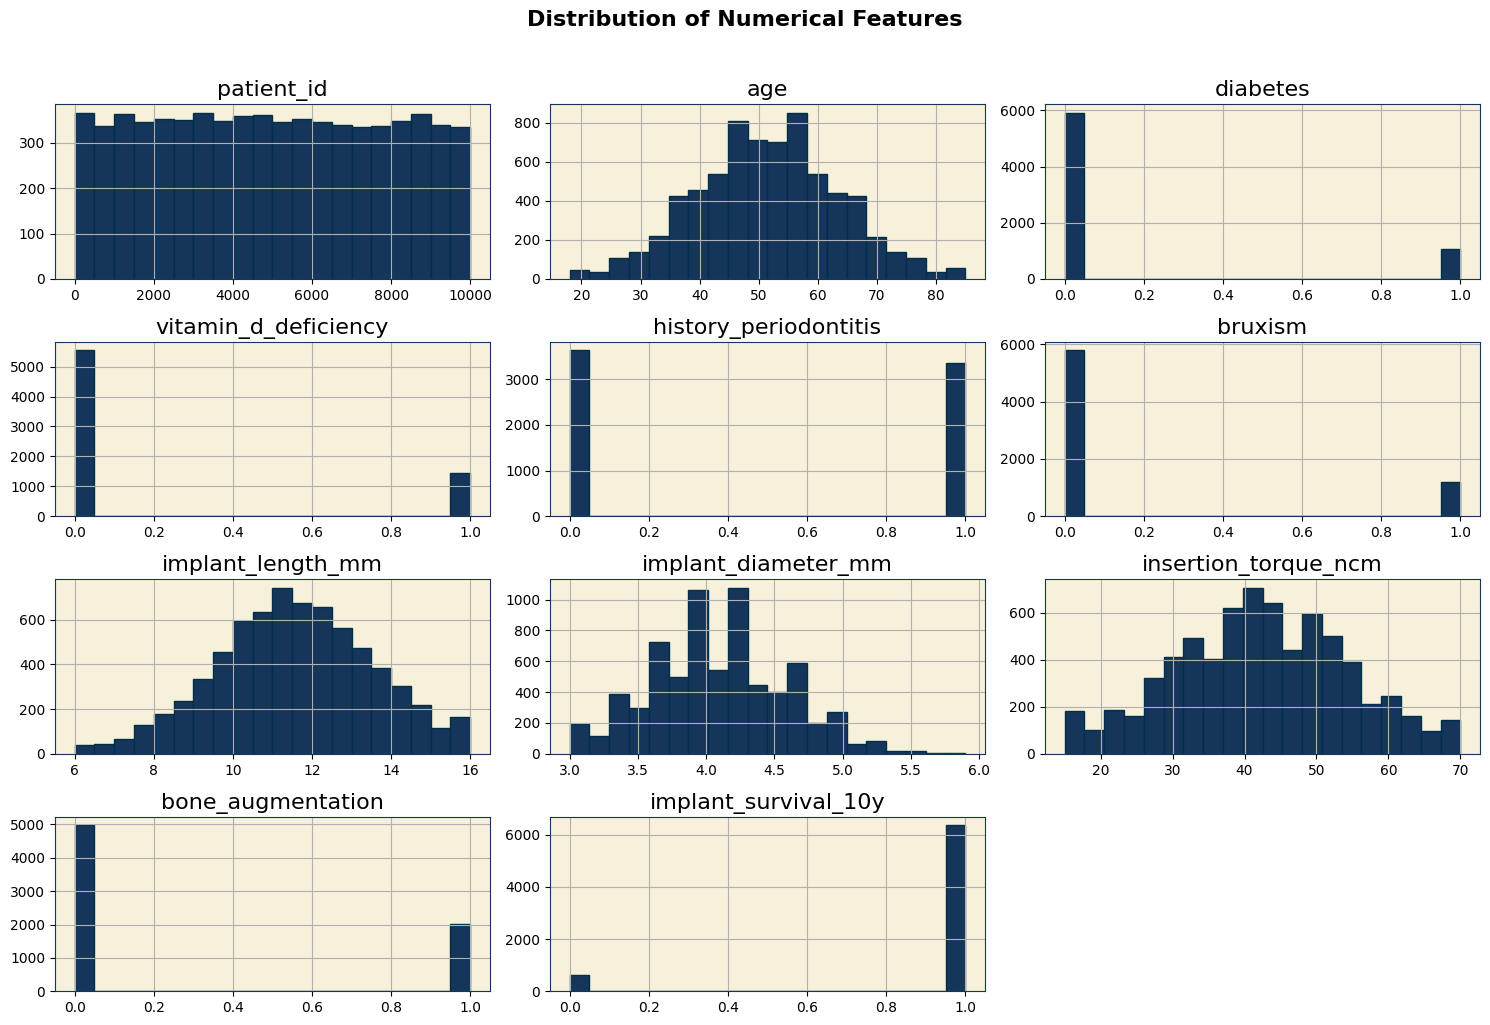

In [10]:
# TODO: Create histograms for all numerical features to understand their distributions.
# Hint: Use df[numerical_cols].hist() and adjust the figure size.

# TODO: Create histograms
# df[numerical_cols].hist(bins=20, figsize=(15, 10), color=COLORS['periospot_blue'], 
#                         edgecolor=COLORS['mystic_blue'])

df[numerical_cols].hist(bins=20, figsize=(15, 10), color=COLORS['periospot_blue'], 
                        edgecolor=COLORS['mystic_blue'])


plt.suptitle('Distribution of Numerical Features', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()

# TODO: Save the figure
plt.savefig('../figures/numerical_distributions.png', dpi=150, bbox_inches='tight')
plt.show()


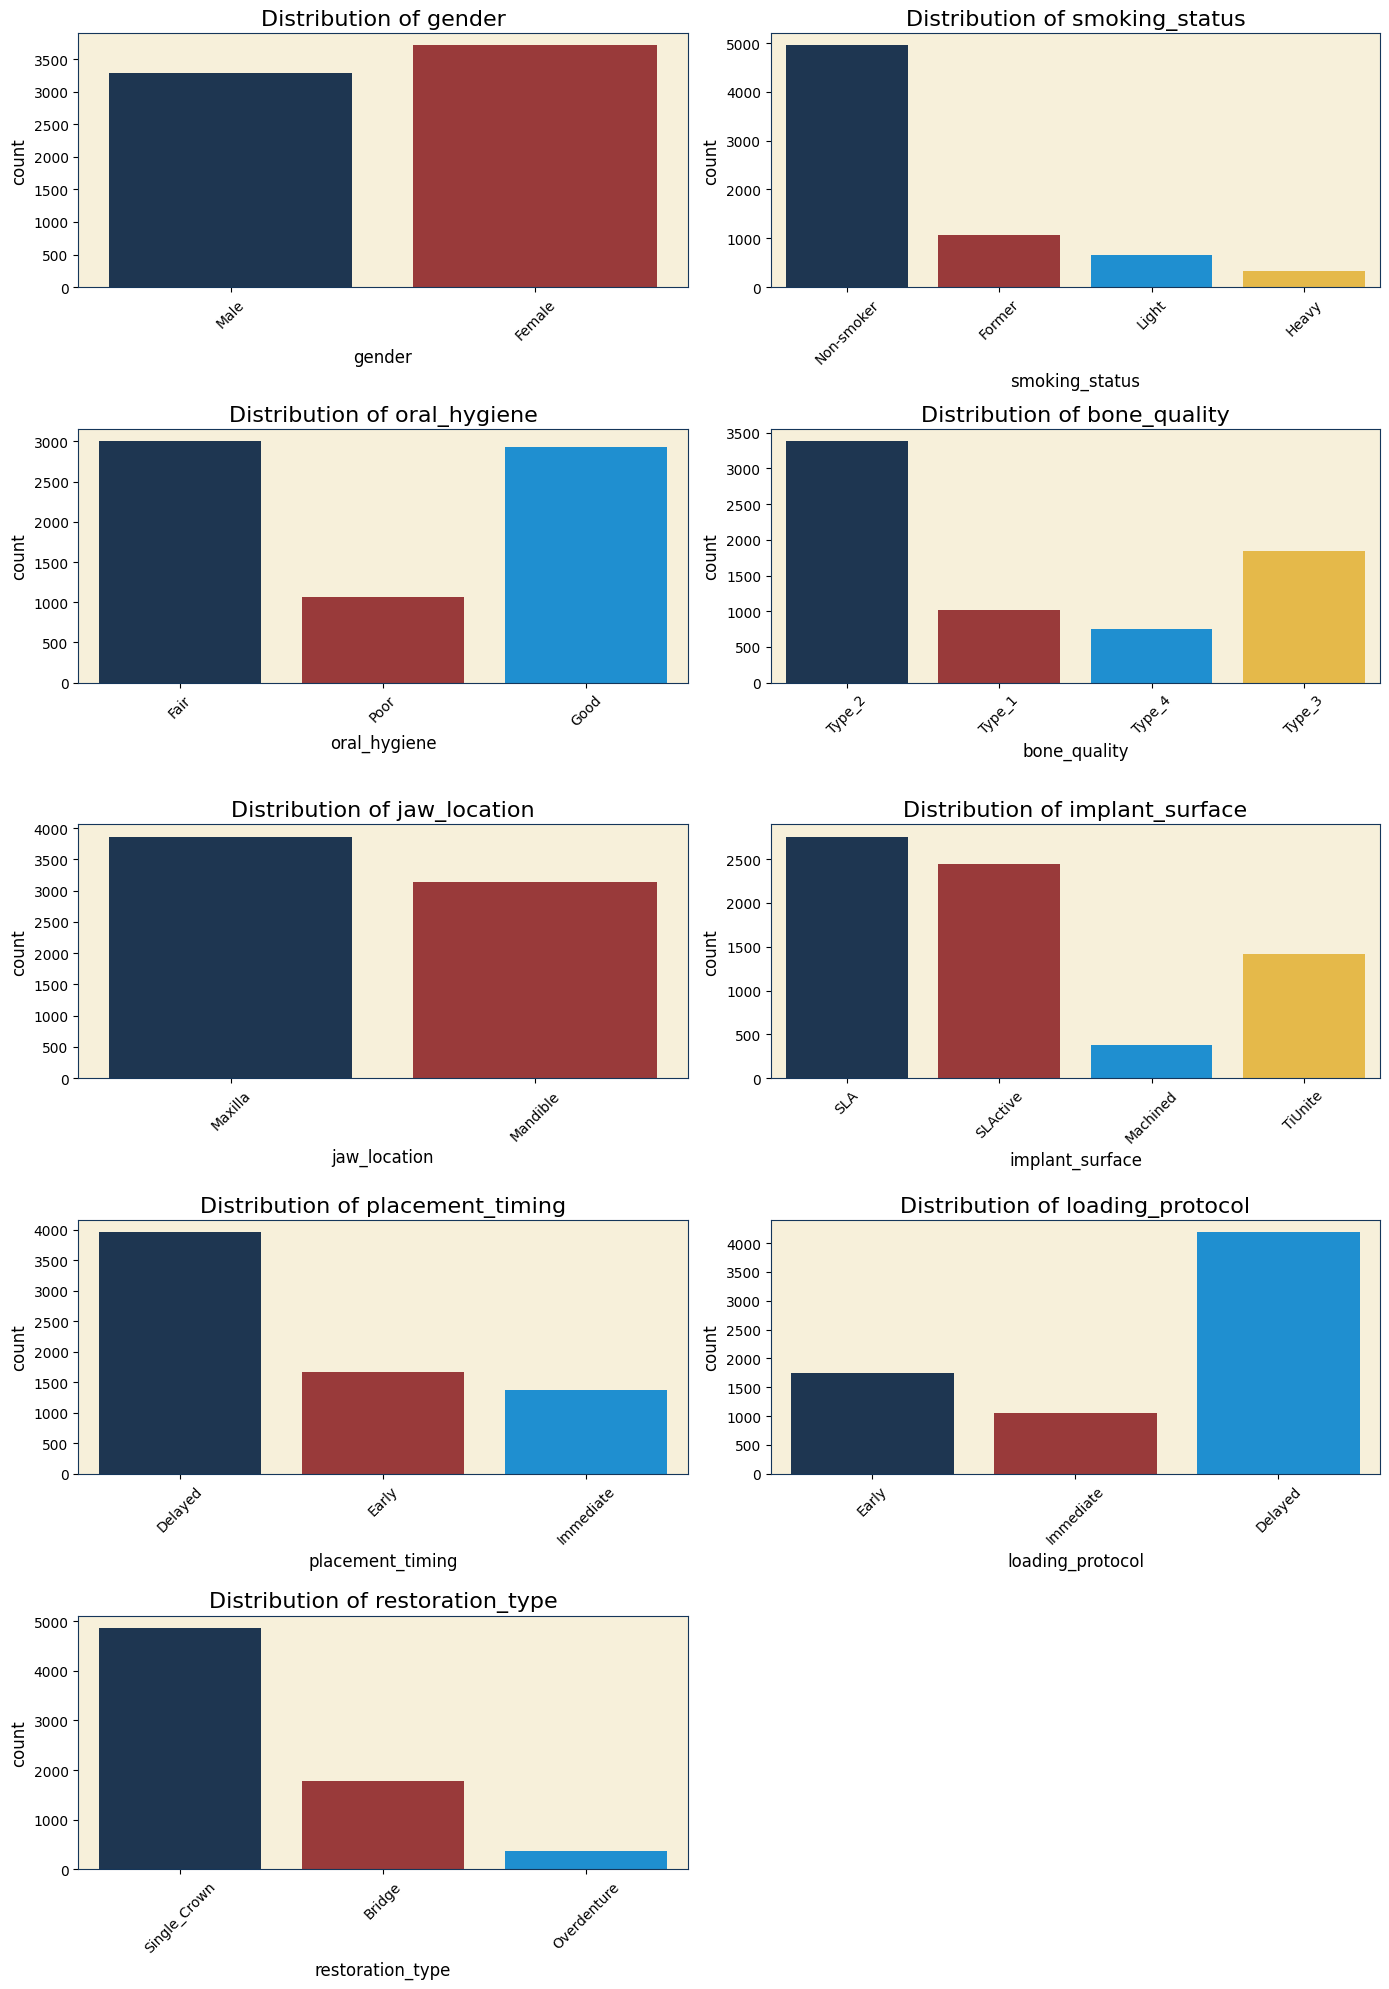

In [11]:
# TODO: Create count plots for all categorical features.
# Hint: Loop through the categorical columns and use sns.countplot().

# First, determine how many categorical columns we have to set up the subplot grid
n_cats = len(categorical_cols) if 'categorical_cols' in dir() else 0

if n_cats > 0:
    n_cols = 2
    n_rows = (n_cats + 1) // 2
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows))
    axes = axes.flatten() if n_cats > 1 else [axes]
    
    # TODO: Loop through categorical columns and create count plots
    # for i, col in enumerate(categorical_cols):
    #     sns.countplot(data=df, x=col, palette=periospot_palette, ax=axes[i])
    #     axes[i].set_title(f'Distribution of {col}')
    #     axes[i].tick_params(axis='x', rotation=45)
    for i, col in enumerate(categorical_cols):
        sns.countplot(data=df, x=col, palette=periospot_palette, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].tick_params(axis='x', rotation=45)
    
    # Hide any unused subplots
    for j in range(n_cats, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    # TODO: Save the figure
    plt.savefig('../figures/categorical_distributions.png', dpi=150, bbox_inches='tight')
    plt.show()
else:
    print("No categorical columns found or not yet defined.")


---

### 4. Bivariate Analysis (Features vs. Target)

Now let's see how each feature relates to the target variable. This can give us hints about which features might be predictive.


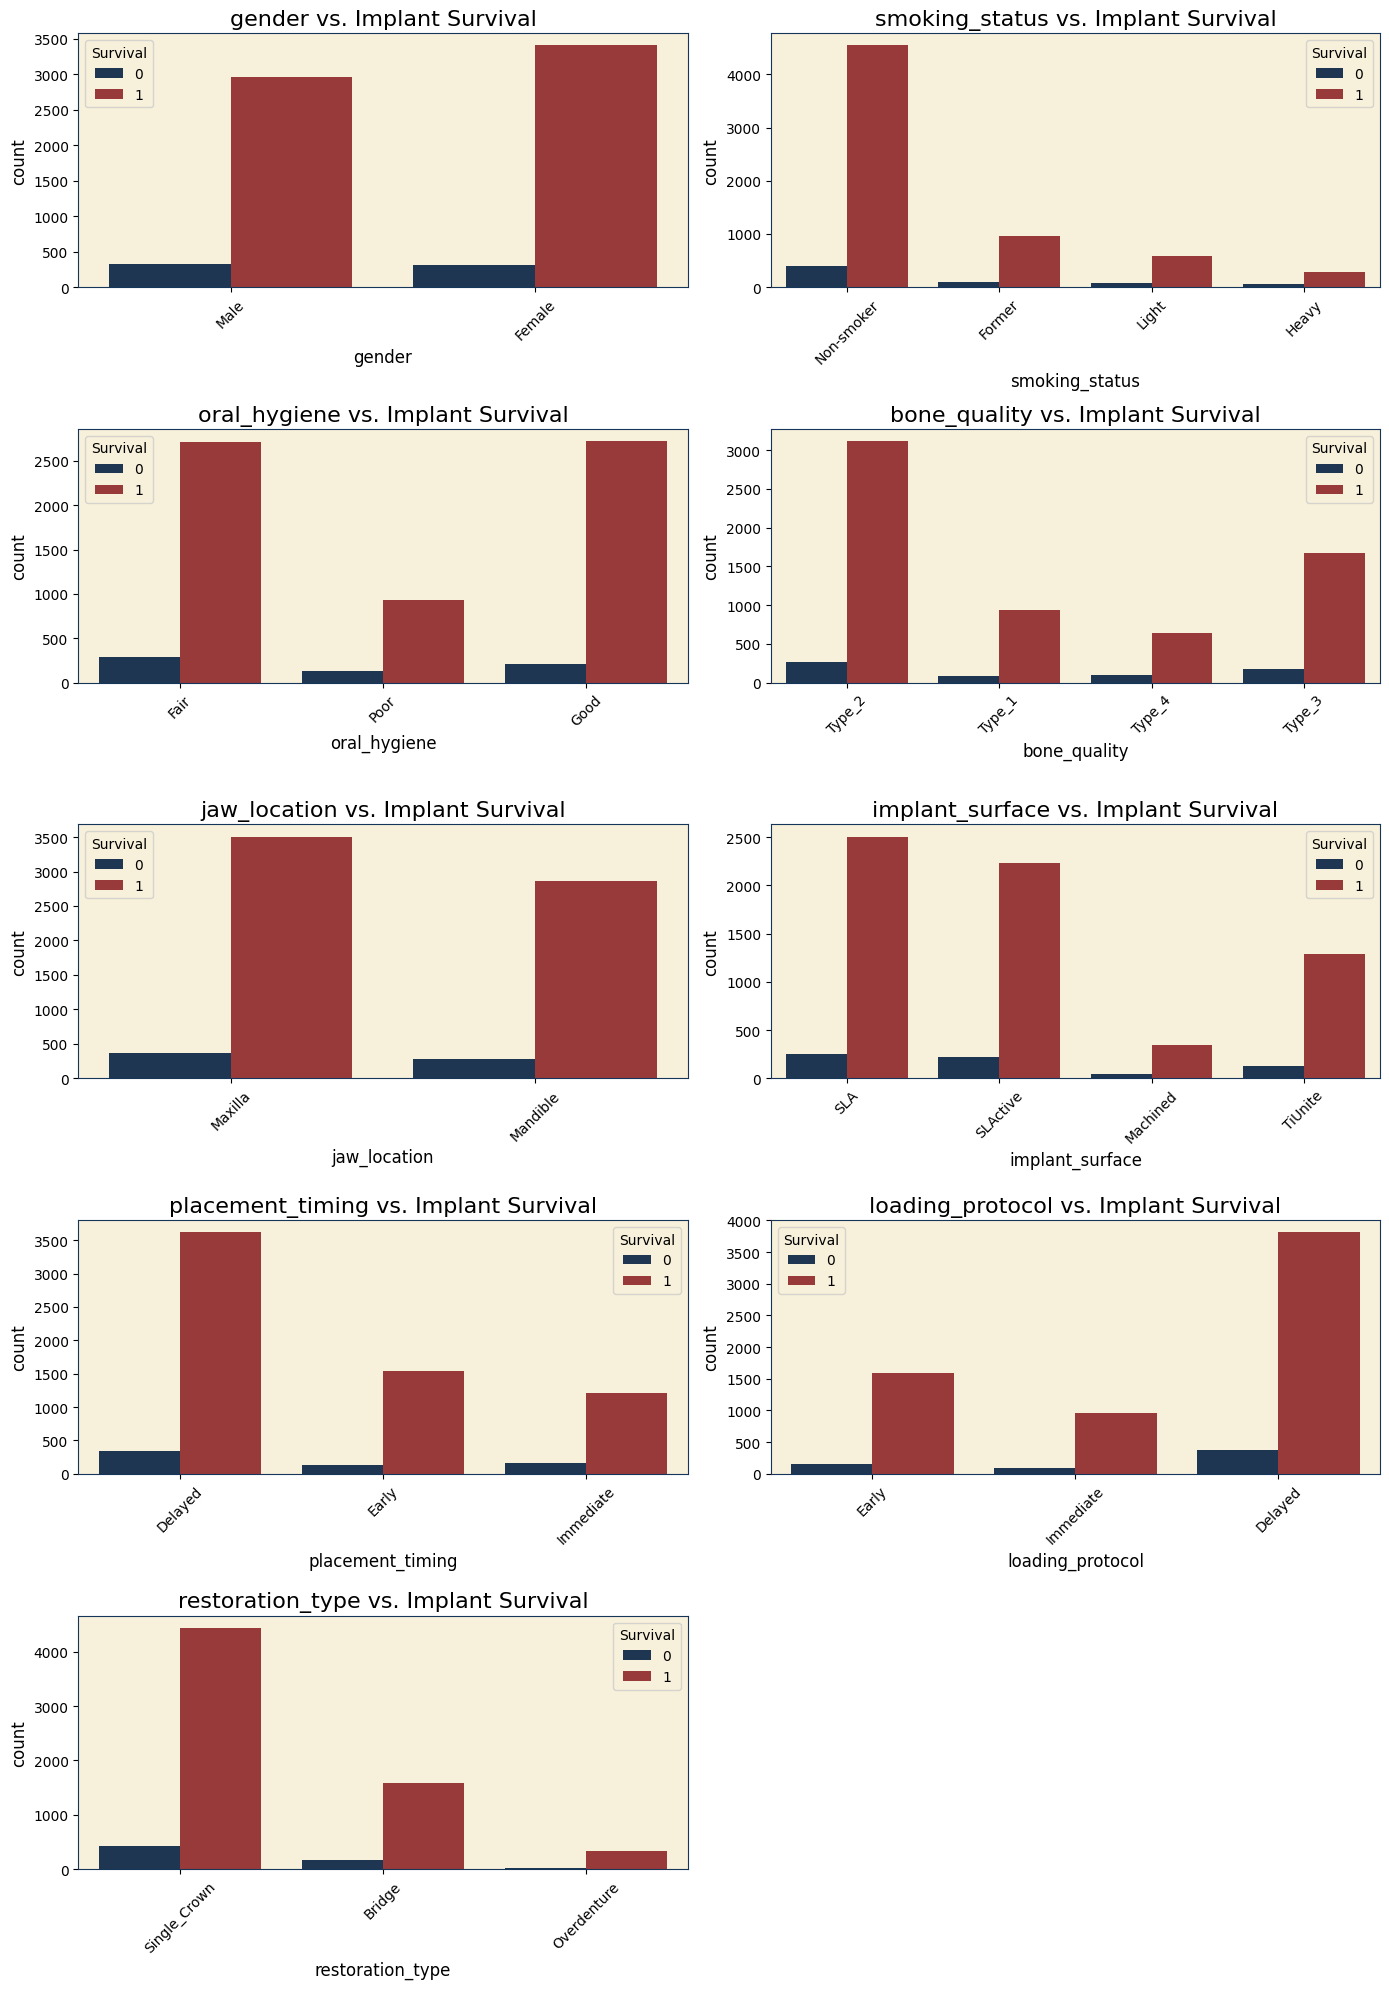

In [13]:
# TODO: For each categorical feature, create a count plot showing the distribution of the target variable.
# Hint: Use sns.countplot() with the 'hue' parameter set to the target variable.

n_cats = len(categorical_cols) if 'categorical_cols' in dir() else 0

if n_cats > 0:
    n_cols = 2
    n_rows = (n_cats + 1) // 2
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows))
    axes = axes.flatten() if n_cats > 1 else [axes]
    
    # TODO: Loop through categorical columns and create count plots with hue
    # for i, col in enumerate(categorical_cols):
    #     sns.countplot(data=df, x=col, hue='implant_survival_10y', 
    #                   palette=[COLORS['periospot_blue'], COLORS['crimson_blaze']], ax=axes[i])
    #     axes[i].set_title(f'{col} vs. Implant Survival')
    #     axes[i].tick_params(axis='x', rotation=45)
    #     axes[i].legend(title='Survival')
    for i, col in enumerate(categorical_cols):
        sns.countplot(data=df, x=col, hue='implant_survival_10y', 
                      palette=[COLORS['periospot_blue'], COLORS['crimson_blaze']], ax=axes[i])
        axes[i].set_title(f'{col} vs. Implant Survival')
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].legend(title='Survival')
    
    for j in range(n_cats, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    # TODO: Save the figure
    plt.savefig('../figures/categorical_vs_target.png', dpi=150, bbox_inches='tight')
    plt.show()
else:
    print("No categorical columns found or not yet defined.")


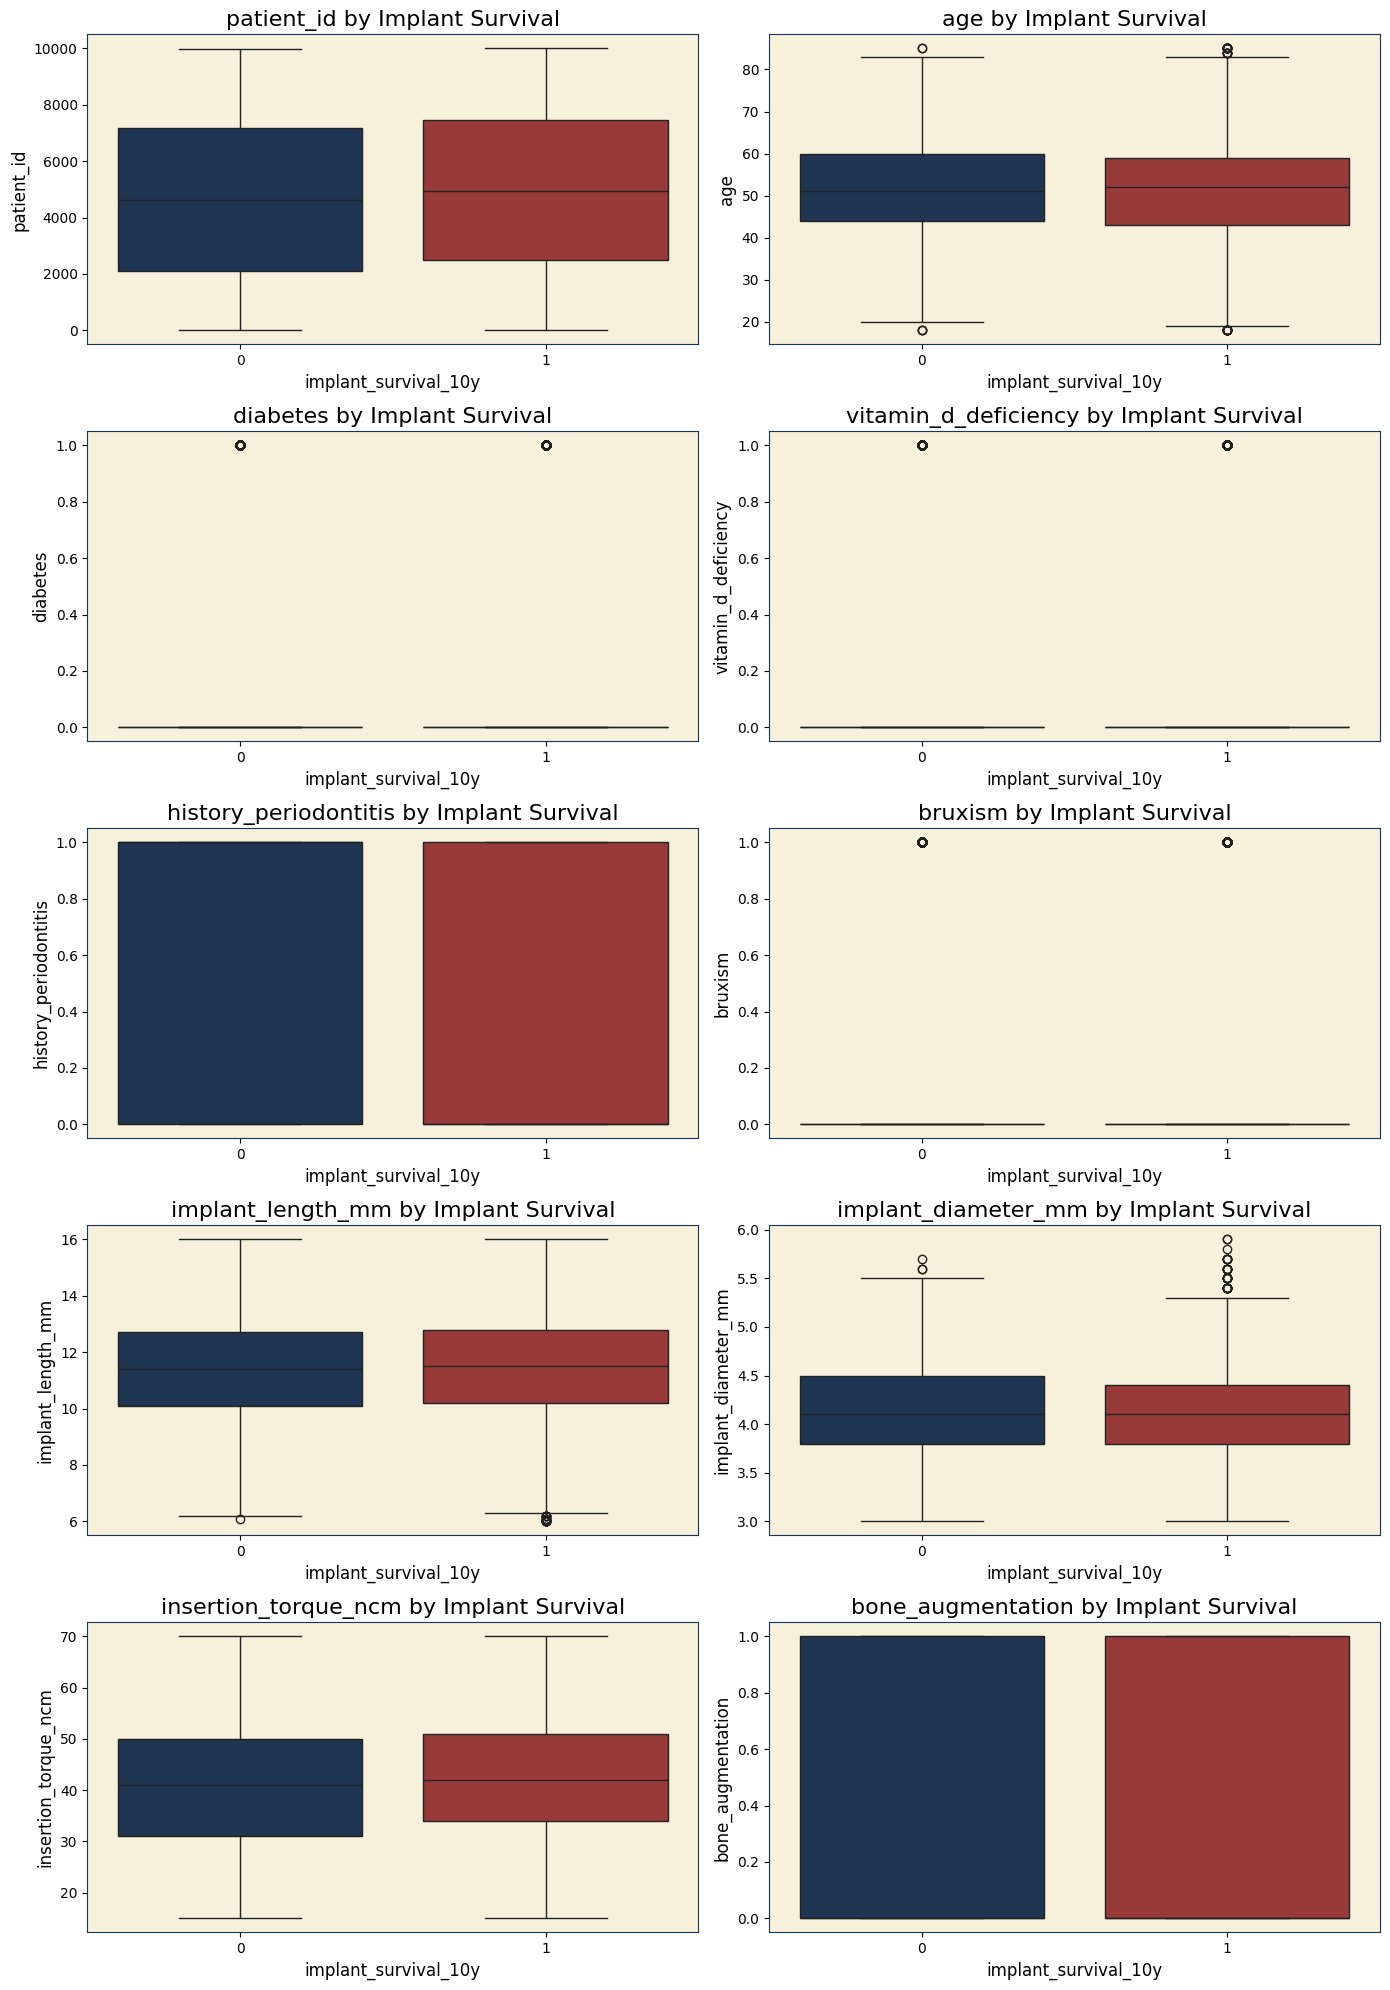

In [14]:
# TODO: For each numerical feature, create a box plot to see how its distribution varies with the target.
# Hint: Use sns.boxplot() with x='implant_survival_10y'.

# Exclude the target from numerical columns if it's there
num_features = [col for col in numerical_cols if col != 'implant_survival_10y'] if 'numerical_cols' in dir() else []
n_nums = len(num_features)

if n_nums > 0:
    n_cols_plot = 2
    n_rows_plot = (n_nums + 1) // 2
    
    fig, axes = plt.subplots(n_rows_plot, n_cols_plot, figsize=(14, 4 * n_rows_plot))
    axes = axes.flatten() if n_nums > 1 else [axes]
    
    # TODO: Loop through numerical features and create box plots
    # for i, col in enumerate(num_features):
    #     sns.boxplot(data=df, x='implant_survival_10y', y=col,
    #                 palette=[COLORS['periospot_blue'], COLORS['crimson_blaze']], ax=axes[i])
    #     axes[i].set_title(f'{col} by Implant Survival')
    for i, col in enumerate(num_features):
        sns.boxplot(data=df, x='implant_survival_10y', y=col,
                    palette=[COLORS['periospot_blue'], COLORS['crimson_blaze']], ax=axes[i])
        axes[i].set_title(f'{col} by Implant Survival')
    
    for j in range(n_nums, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    # TODO: Save the figure
    plt.savefig('../figures/numerical_vs_target.png', dpi=150, bbox_inches='tight')
    plt.show()
else:
    print("No numerical columns found or not yet defined.")


---

### 5. Correlation Analysis

Correlation analysis helps us understand relationships between numerical features and can reveal multicollinearity issues.


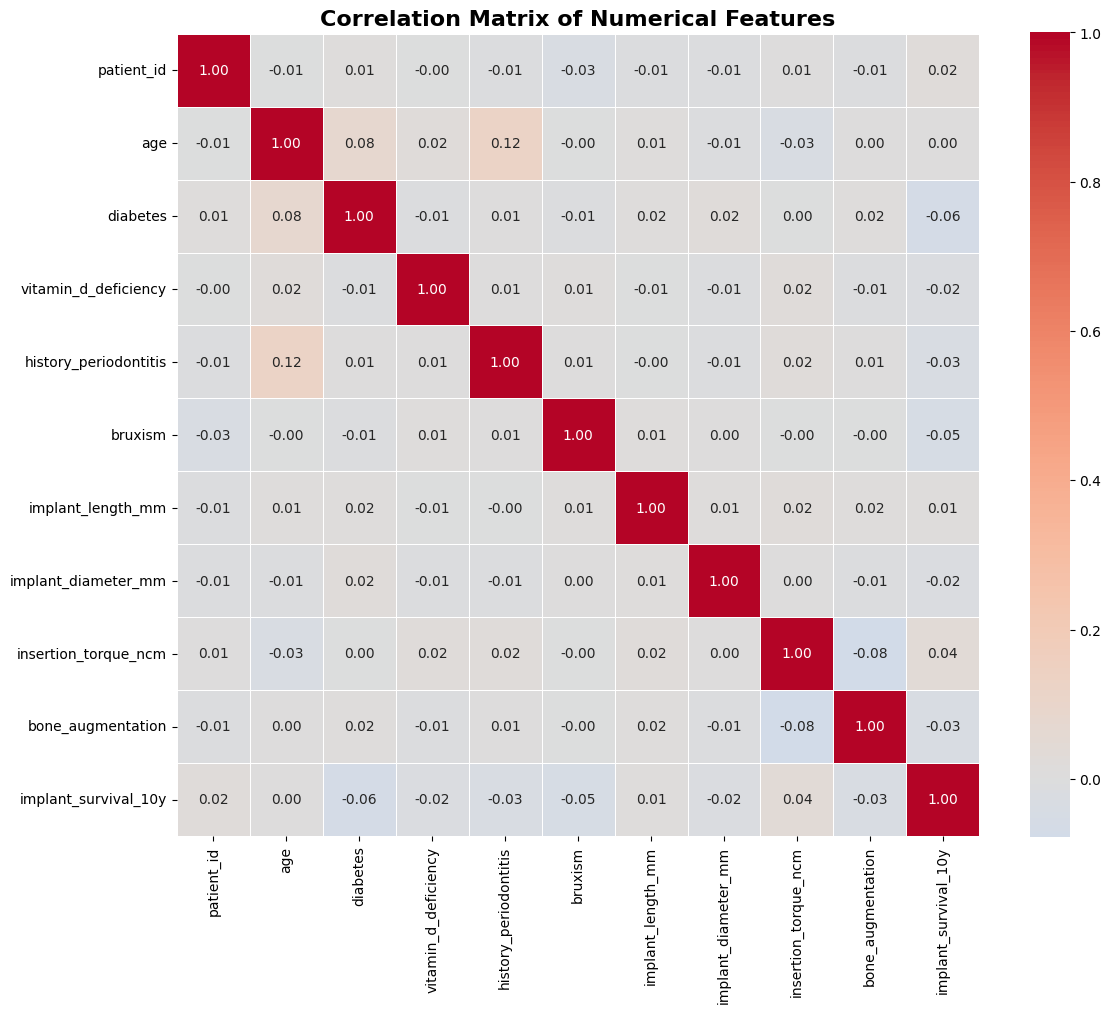

In [15]:
# TODO: Calculate the correlation matrix for the numerical features.
# Hint: Use the .corr() method.

correlation_matrix = df[numerical_cols].corr()

# Display the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, fmt='.2f', ax=plt.gca())
plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('../figures/correlation_matrix.png', dpi=150, bbox_inches='tight')
plt.show()


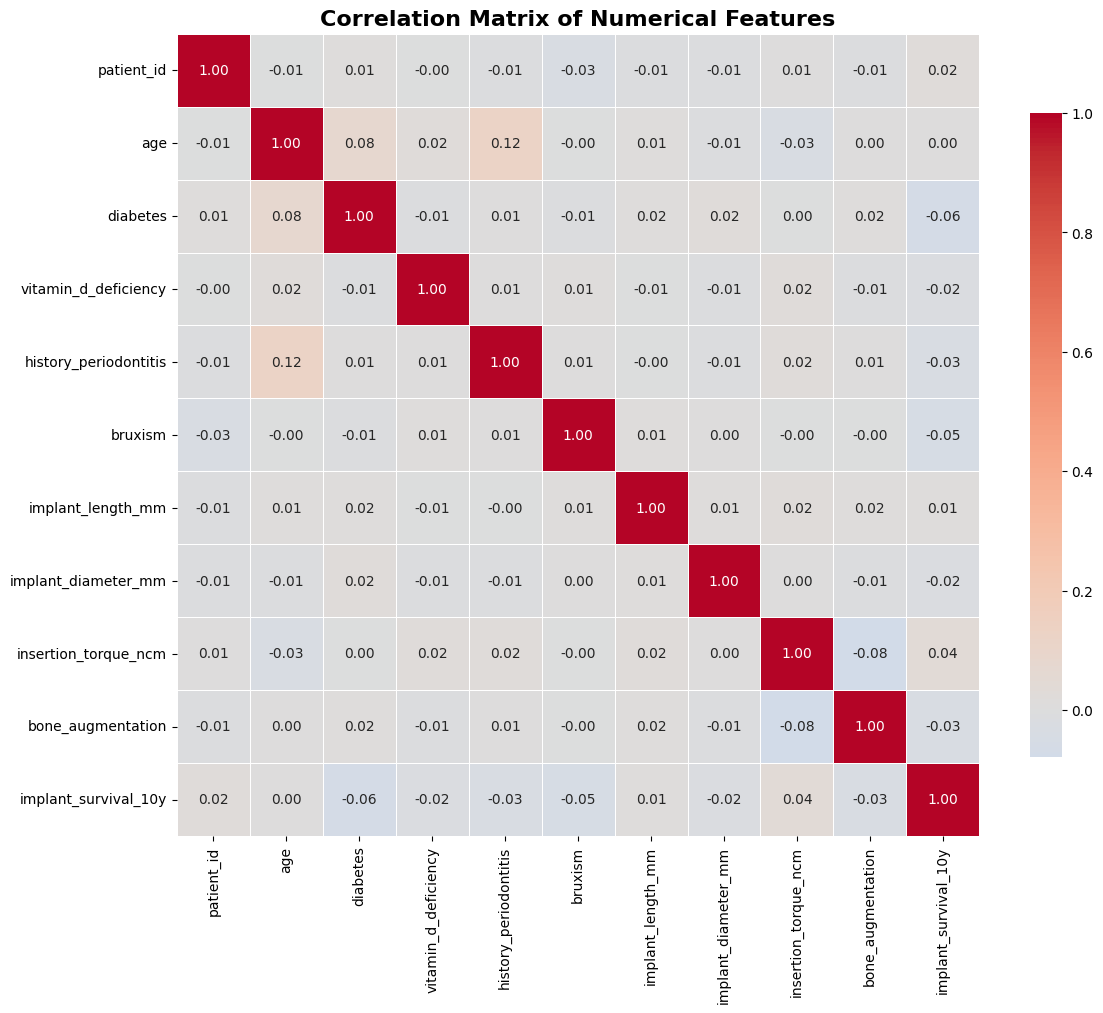

In [16]:
# TODO: Create a heatmap to visualize the correlation matrix.
# Hint: Use sns.heatmap() with the correlation matrix.

fig, ax = plt.subplots(figsize=(12, 10))

# Create a custom colormap using Periospot colors
# TODO: Create the heatmap
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
#             square=True, linewidths=0.5, fmt='.2f', ax=ax,
#             cbar_kws={'shrink': 0.8})
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, fmt='.2f', ax=ax,
            cbar_kws={'shrink': 0.8})

ax.set_title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold')

plt.tight_layout()
# TODO: Save the figure
plt.savefig('../figures/correlation_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()


In [17]:
# TODO: Identify features most correlated with the target variable.
# Hint: Use correlation_matrix['implant_survival_10y'].sort_values(ascending=False)

# This will help you understand which features have the strongest relationship
# with the outcome we're trying to predict.

correlation_with_target = correlation_matrix['implant_survival_10y'].sort_values(ascending=False)

print(correlation_with_target)


implant_survival_10y     1.000000
insertion_torque_ncm     0.038785
patient_id               0.021751
implant_length_mm        0.011797
age                      0.001702
implant_diameter_mm     -0.017816
vitamin_d_deficiency    -0.018404
history_periodontitis   -0.031702
bone_augmentation       -0.032145
bruxism                 -0.049001
diabetes                -0.062964
Name: implant_survival_10y, dtype: float64


---

### 6. Key Findings & Insights

Summarize your findings from the EDA before moving to preprocessing.


## 📋 EDA Summary & Key Findings

---

### 📊 Dataset Overview
| Attribute | Value |
|-----------|-------|
| **Number of samples** | 7,000 implant cases |
| **Number of features** | 20 columns (19 features + 1 target) |
| **Numerical features** | 11 (including binary flags like diabetes, bruxism) |
| **Categorical features** | 9 (gender, smoking_status, oral_hygiene, etc.) |
| **Target variable** | `implant_survival_10y` (binary: 0=failure, 1=survival) |
| **Missing values** | ✅ None - dataset is complete |

---

### ⚠️ Class Imbalance (Critical Finding)
| Class | Count | Percentage |
|-------|-------|------------|
| **Survival (1)** | 6,367 | **90.96%** |
| **Failure (0)** | 633 | **9.04%** |

**Implication:** The dataset is highly imbalanced. A naive model predicting "survival" for everyone would achieve ~91% accuracy but would be clinically useless. We need:
- Appropriate evaluation metrics (ROC-AUC, PR-AUC, F1-score instead of accuracy)
- Class balancing strategies (class weights, SMOTE, or threshold tuning)

---

### 🔍 Key Observations from Visualizations

**1. Numerical Feature Distributions:**
- `age`: Normally distributed, centered around 50-55 years
- `implant_length_mm`: Ranges 6-16mm, peak around 10-12mm
- `implant_diameter_mm`: Ranges 3-6mm, most common around 4-4.5mm
- `insertion_torque_ncm`: Ranges 15-70 Ncm, centered around 40-45 Ncm
- Binary features (`diabetes`, `bruxism`, `vitamin_d_deficiency`): Heavily skewed toward 0

**2. Categorical Feature Distributions:**
- `gender`: Roughly balanced (Male ~47%, Female ~53%)
- `smoking_status`: Mostly non-smokers (~72%), heavy smokers are rare (~4%)
- `oral_hygiene`: Good and Fair are common, Poor is less frequent (~15%)
- `bone_quality`: Type_2 is most common (~50%), Type_4 is rare (~10%)
- `restoration_type`: Single_Crown dominates (~70%)
- `loading_protocol`: Delayed loading is most common (~60%)

**3. Bivariate Analysis (Features vs. Target):**
- No single feature shows dramatic differences between survival/failure groups
- Subtle patterns visible in categorical features (smoking, oral hygiene, bone quality)
- Box plots show similar distributions for numerical features across both classes

---

### 📈 Correlation Analysis Results

**Features Most Correlated with Target (`implant_survival_10y`):**
| Feature | Correlation | Direction |
|---------|-------------|-----------|
| `insertion_torque_ncm` | +0.039 | Weak positive |
| `implant_length_mm` | +0.012 | Very weak positive |
| `diabetes` | -0.063 | Weak negative |
| `bruxism` | -0.049 | Weak negative |
| `bone_augmentation` | -0.032 | Weak negative |
| `history_periodontitis` | -0.032 | Weak negative |

**Key Insight:** All correlations are **very weak** (|r| < 0.1). This suggests:
- No single numerical feature is a strong linear predictor
- Predictive power likely comes from **feature combinations** and **categorical variables**
- Tree-based models (Random Forest, XGBoost) may capture non-linear relationships better

---

### 🎯 Recommendations for Preprocessing (Next Steps)

1. **Handle Class Imbalance:**
   - Use `class_weight='balanced'` in models
   - Consider SMOTE oversampling or threshold tuning
   - Use ROC-AUC as primary evaluation metric

2. **Encode Categorical Variables:**
   - One-hot encoding for nominal categories (gender, implant_surface)
   - Consider ordinal encoding for ordered categories (oral_hygiene: Poor < Fair < Good)

3. **Feature Engineering Ideas:**
   - Drop `patient_id` (not predictive, just an identifier)
   - Consider interaction features (e.g., smoking × oral_hygiene)
   - Age binning might capture non-linear effects

4. **Scaling:**
   - StandardScaler or MinMaxScaler for numerical features
   - Required for some models (Logistic Regression, SVM), optional for tree-based models

5. **Train/Validation Split:**
   - Use stratified split to maintain class proportions
   - Consider 80/20 or 70/30 split

---

### 📁 Figures Generated
All visualizations saved to `/figures/`:
- `target_distribution.png` - Class imbalance visualization
- `numerical_distributions.png` - Histograms of numerical features
- `categorical_distributions.png` - Count plots of categorical features
- `numerical_vs_target.png` - Box plots comparing classes
- `categorical_vs_target.png` - Stacked bar charts by class
- `correlation_heatmap.png` - Feature correlation matrix


---

### ✅ EDA Complete!

**Next Step:** Proceed to `02_Data_Preprocessing.ipynb` to clean and prepare the data for modeling.
